In [8]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import shap
import pickle
df = pd.read_csv('cleaned.csv')
df = df.loc[~df.year_built.isnull()]

In [9]:
df = df.drop(['details', 
              'special_features',  
              'transaction_type', 
              'listing_status', 
              'listing_special_features', 
              'census_state_name', 
              'census_county_name', 'Unnamed: 0', 'rent'], axis=1)

In [ ]:
## At the moment, we don't have enough observations, so we will cut to large ones only at the moment.

In [31]:
values = df.zipcode.value_counts(ascending = False)
values
allowed_values = values.loc[values>=30].index

In [32]:
allowed_values

Int64Index([30052, 30135, 30157, 30132, 30032, 30506, 30512, 30004, 30310,
            30114,
            ...
            30635, 30107, 30152, 30238, 30620, 30116, 30240, 30656, 30084,
            31216],
           dtype='int64', length=143)

In [33]:
## creates dataframe for each zipcode
zip_dfs=[]
for zipcode in list(allowed_values):
    zip_dfs.append((df.loc[df.zipcode==zipcode,:], zipcode)
                  )
    
    
    
## list for models
Lasso_models = []
Ridge_models = []

## list for shap values and explainers
Lasso_shaps = []
Ridge_shaps = []


for zdf in zip_dfs:
    
    X = zdf[0].drop(['price', 
                     'caprate',
                     'zipcode',
                     "latitude",
                     'longitude', 
                     'city', 
                     'full_street_address', 
                     'county_name', 
                     'overall_crime_grade', ## latter two need to be turned into ordinals...
                     'property_crime_grade'], axis=1)

    y = zdf[0][['caprate']]
    
#     if len(zdf[0]) < 10:
#         X_train = X
#         y_train = y
        
#     else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y,
        train_size = 0.8,
        random_state = 0)
    
    Lasso_models.append((LassoCV(cv = 3, random_state=0).fit(X_train, np.ravel(y_train)), zdf[1]))
    
    Ridge_models.append((RidgeCV(cv = 3).fit(X_train, np.ravel(y_train)), zdf[1]))
    
    explainer = shap.Explainer(Lasso_models[-1][0], X)
    shap_values = explainer(X)
    Lasso_shaps.append([explainer, shap_values])
    
    explainer = shap.Explainer(Ridge_models[-1][0], X)
    shap_values = explainer(X)
    Ridge_shaps.append([explainer, shap_values])

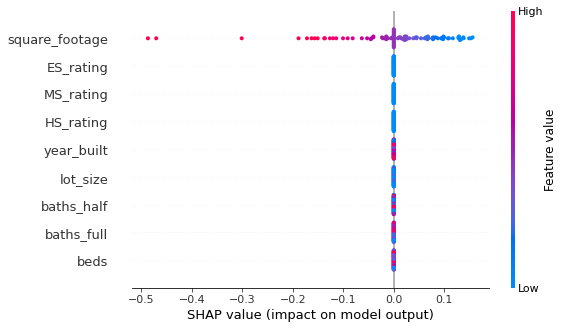

In [34]:
shap.plots.beeswarm(Lasso_shaps[5][1])

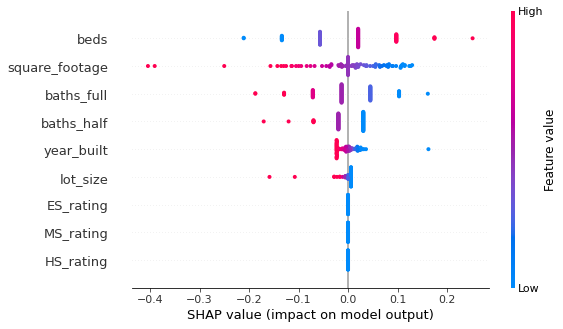

In [35]:
shap.plots.beeswarm(Ridge_shaps[5][1])

In [ ]:
filename = 'lasso_models.sav'
pickle.dump(Lasso_models, open(filename, 'wb'))

filename = 'ridge_models.sav'
pickle.dump(Ridge_models, open(filename, 'wb'))

In [39]:
Lasso_models[5][0].

array([1.87059395e+02, 1.74452218e+02, 1.62694722e+02, 1.51729643e+02,
       1.41503573e+02, 1.31966705e+02, 1.23072591e+02, 1.14777910e+02,
       1.07042263e+02, 9.98279731e+01, 9.30999018e+01, 8.68252800e+01,
       8.09735468e+01, 7.55162007e+01, 7.04266615e+01, 6.56801402e+01,
       6.12535186e+01, 5.71252365e+01, 5.32751867e+01, 4.96846174e+01,
       4.63360405e+01, 4.32131465e+01, 4.03007250e+01, 3.75845910e+01,
       3.50515154e+01, 3.26891606e+01, 3.04860206e+01, 2.84313648e+01,
       2.65151860e+01, 2.47281512e+01, 2.30615566e+01, 2.15072848e+01,
       2.00577658e+01, 1.87059395e+01, 1.74452218e+01, 1.62694722e+01,
       1.51729643e+01, 1.41503573e+01, 1.31966705e+01, 1.23072591e+01,
       1.14777910e+01, 1.07042263e+01, 9.98279731e+00, 9.30999018e+00,
       8.68252800e+00, 8.09735468e+00, 7.55162007e+00, 7.04266615e+00,
       6.56801402e+00, 6.12535186e+00, 5.71252365e+00, 5.32751867e+00,
       4.96846174e+00, 4.63360405e+00, 4.32131465e+00, 4.03007250e+00,
      